In [1]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [2]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

Analysis:  
Some rows contain only the word response  
Income Box encoding possibly weird  
The character opinion columns are unnnamed

### Cleaning

#### Drop Columns

The columns referring to characters and the expanded universe will not be used for analysis


In [4]:
drop_columns = star_wars.iloc[:,15:32].columns ; drop_columns
star_wars = star_wars.drop(columns=drop_columns)

#### Rename Columns

In [5]:
new_columns = {
    'Have you seen any of the 6 films in the Star Wars franchise?' : 'seen_any',
    'Do you consider yourself to be a fan of the Star Wars film franchise?' : 'fan',
    'Which of the following Star Wars films have you seen? Please select all that apply.' : 'seen_1',
    'Unnamed: 4' : 'seen_2',
    'Unnamed: 5' : 'seen_3',
    'Unnamed: 6' : 'seen_4',
    'Unnamed: 7' : 'seen_5',
    'Unnamed: 8' : 'seen_6',
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.' : 'pref_1',
    'Unnamed: 10' : 'pref_2',
    'Unnamed: 11' : 'pref_3',
    'Unnamed: 12' : 'pref_4',
    'Unnamed: 13' : 'pref_5',
    'Unnamed: 14' : 'pref_6',
    'Do you consider yourself to be a fan of the Star Trek franchise?' : 'trek_fan'
}

star_wars = star_wars.rename(columns=new_columns)
star_wars.columns

Index(['RespondentID', 'seen_any', 'fan', 'seen_1', 'seen_2', 'seen_3',
       'seen_4', 'seen_5', 'seen_6', 'pref_1', 'pref_2', 'pref_3', 'pref_4',
       'pref_5', 'pref_6', 'trek_fan', 'Gender', 'Age', 'Household Income',
       'Education', 'Location (Census Region)'],
      dtype='object')

#### Remove Null Values


In [6]:
star_wars = star_wars[star_wars['RespondentID'].notnull()]

#### Convert Booleans

In [7]:
yes_no = {
    "Yes": True,
    "No": False
}

star_wars['seen_any'] = (
    star_wars['seen_any']
    .map(yes_no) 
)

star_wars['fan'] = (
    star_wars['fan']
    .map(yes_no) 
)

star_wars['trek_fan'] = (
    star_wars['trek_fan']
    .map(yes_no) 
)


for i in star_wars.columns[3:9]:
    star_wars[i] = star_wars[i].notnull()

The columns above represent True/False facts  
Have they seen any star wars film?  
Do they like star wars?  
Then 6 columns representing which of the films they have seen  

#### Convert Preferences


In [8]:
for i in star_wars.columns[9:15]:
    star_wars[i] = star_wars[i].astype(float)

#### Visualising Preferences


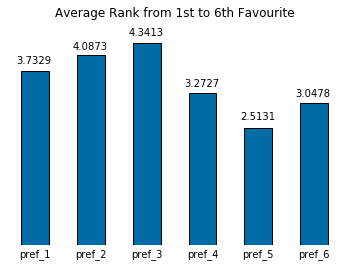

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

preferences = star_wars.iloc[:,9:15].mean()
ax = preferences.plot(
    kind='bar', 
    color=(0, 107/255, 164/255), 
    rot=360)

ax.tick_params(bottom="off", left="off", top="off", right="off")
for key, spine in ax.spines.items():
    spine.set_visible(False)

ax.set_title('Average Rank from 1st to 6th Favourite')

ax.yaxis.set_ticklabels([])
ax.set_ylim([0,4.8])

ax.text(-0.33, 3.9, '3.7329')
ax.text(0.67, 4.2, '4.0873')
ax.text(1.68, 4.5, '4.3413')
ax.text(2.67, 3.4, '3.2727')
ax.text(3.67, 2.7, '2.5131')
ax.text(4.67, 3.2, '3.0478')

In the graph above, a score of 1 would mean that everyone agreed that that movie was the best, and a score of 6 that everyone agreed it was the worst.  

Based off of this Star Wars Episode 5 is the best recieved, and Episode 3 the worst.  

The original trilogy is thought of better than the prequels.

#### Visualising Movies Seen

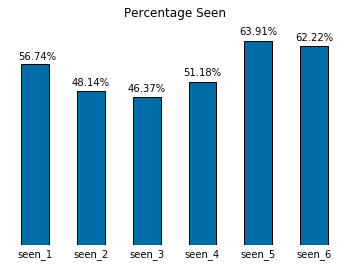

In [10]:
seen = star_wars.iloc[:,3:9].sum() / star_wars.shape[0]
ax = seen.plot(
    kind='bar', 
    color=(0, 107/255, 164/255), 
    rot=360)

ax.tick_params(bottom="off", left="off", top="off", right="off")
for key, spine in ax.spines.items():
    spine.set_visible(False)
    
ax.set_title('Percentage Seen')
ax.yaxis.set_ticklabels([])

ax.text(-0.3, 0.58, '56.74%')
ax.text(0.66, 0.5, '48.14%')
ax.text(1.66, 0.48, '46.37%')
ax.text(2.66, 0.53, '51.18%')
ax.text(3.66, 0.66, '63.91%')
ax.text(4.66, 0.64, '62.22%')

These have a pretty clear correlation with the average ranking of the movie.  

The more people have seen the movie, the higher the movie is on most people's lists.

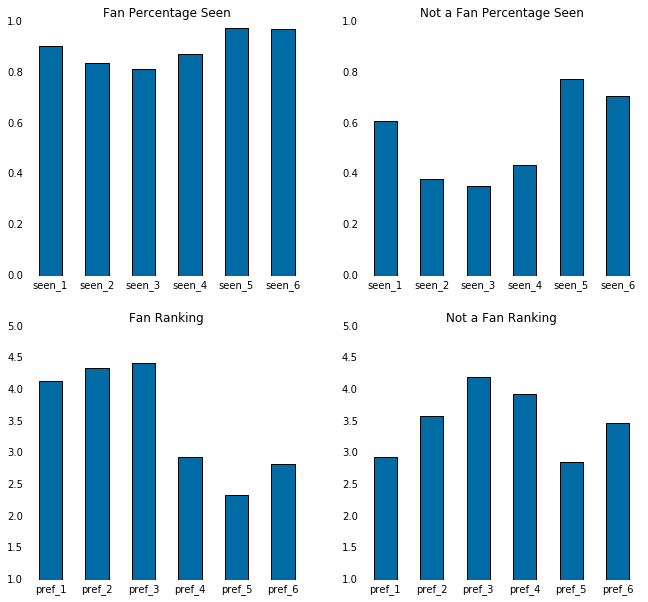

In [11]:
fan = star_wars[star_wars['fan']==True]
not_fan = star_wars[star_wars['fan']==False]

seen_fan = fan.iloc[:,3:9].sum() / fan.shape[0]
seen_nf = not_fan.iloc[:,3:9].sum() / not_fan.shape[0]

rank_fan = fan.iloc[:,9:15].mean()
rank_nf = not_fan.iloc[:,9:15].mean()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11,10))
ax1 = seen_fan.plot(
    ax = axes[0, 0],
    kind='bar',
    color=(0, 107/255, 164/255),
    rot=360)

ax2 = seen_nf.plot(
    ax = axes[0, 1],
    kind='bar',
    color=(0, 107/255, 164/255),
    rot=360)

ax3 = rank_fan.plot(
    ax = axes[1, 0],
    kind='bar',
    color=(0, 107/255, 164/255),
    rot=360)

ax4 = rank_nf.plot(
    ax = axes[1, 1],
    kind='bar',
    color=(0, 107/255, 164/255),
    rot=360)

ax.set_ylim([0,1])

for row in axes:
    for ax in row:
        ax.tick_params(bottom="off", left="off", top="off", right="off")
        for key, spine in ax.spines.items():
            spine.set_visible(False)


ax1.set_ylim([0,1])
#ax1.yaxis.set_ticklabels([0, '', '', '','', 1])

ax2.set_ylim([0,1])
#ax2.yaxis.set_ticklabels([0, '', '', '','', 1])
    
ax3.set_ylim([1,5])
ax4.set_ylim([1,5])

ax1.set_title('Fan Percentage Seen')
ax2.set_title('Not a Fan Percentage Seen')
ax3.set_title('Fan Ranking')
ax4.set_title('Not a Fan Ranking')

(0, 0.52)

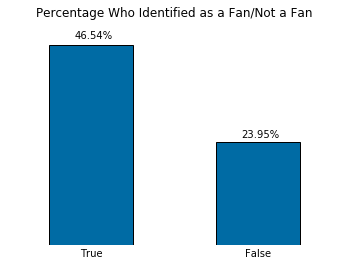

In [12]:
ax = (star_wars['fan'].value_counts() / star_wars.shape[0]).plot(
    kind='bar',
    color=(0, 107/255, 164/255),
    rot=360)

ax.tick_params(bottom="off", left="off", top="off", right="off")
for key, spine in ax.spines.items():
    spine.set_visible(False)

ax.yaxis.set_ticklabels([])
ax.set_title('Percentage Who Identified as a Fan/Not a Fan')
ax.text(-0.1, 0.48, '46.54%')
ax.text(0.9, 0.25, '23.95%')

ax.set_ylim([0,0.52])

Star Wars fans have a quite consistent pattern-  
They have seen all of the movies, prefer the original trilogy, and Episode 5 is their favourite movie.  

Those who are not Star Wars fans have more diverse opinions.
They like Episode 1 roughly the same as Episode 5.
More of them have seen Episode 1, 5 and 6 than the other 3, but the percentages are much lower across the board than for fans

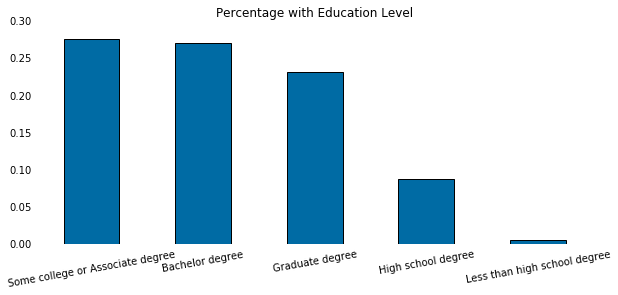

In [13]:
ax = (star_wars['Education'].value_counts() 
      / star_wars.shape[0]
     ).plot(
    kind='bar',
    color=(0, 107/255, 164/255),
    rot=10,
    figsize=[10,4])

ax.tick_params(bottom="off", left="off", top="off", right="off")
for key, spine in ax.spines.items():
    spine.set_visible(False)
    
ax.set_title('Percentage with Education Level')

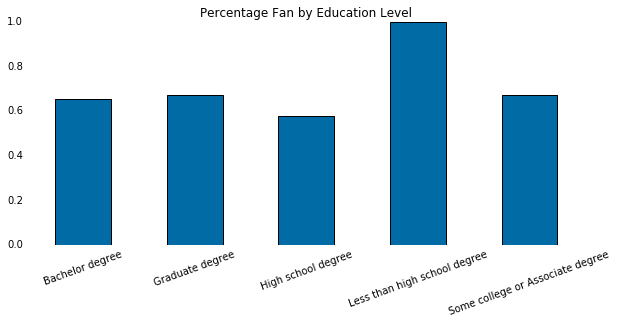

In [14]:
education = star_wars
education['fan'] = education['fan'].astype(float)
education = education.pivot_table(values='fan',
                                  index='Education')

ax = education.plot(
    kind='bar',
    color=(0, 107/255, 164/255),
    rot=20,
    figsize=[10,4],
    legend=False)

ax.tick_params(bottom="off", left="off", top="off", right="off")
for key, spine in ax.spines.items():
    spine.set_visible(False)
    
ax.set_title('Percentage Fan by Education Level')
ax.set_xlabel('')

Excluding high school students, approximately 60% of survey responders are Star Wars fans.